In [34]:
import pandas as pd

olympics_df = pd.read_csv("Summer_Olympic_medallists_1896_to_2008.csv").dropna(axis=1)

## Question 1:
What are top three most winningest countries for total medals?

In [35]:
total_medal_count = olympics_df.groupby("NOC")\
                    .Medal.count()\
                    .reset_index(name="Medal Count")\
                    .sort_values("Medal Count", ascending=False)

total_medal_count.reset_index(drop=True, inplace=True)
total_medal_count.index += 1
total_medal_count.head(3)

,NOC,Medal Count
1,USA,4334
2,URS,2049
3,GBR,1594


## Question 2:
What are the top 10 winningest countries, with each medal type included?

In [36]:
each_medal_counts = pd.crosstab(olympics_df["NOC"], olympics_df["Medal"])

each_medal_counts["Total"] = olympics_df.groupby("NOC")\
                             .Medal.count()\

each_medal_counts = each_medal_counts.sort_values("Total", ascending=False)\
                    .drop(columns=['X'])
                    #column X was inserted as Medal type due to error in data

each_medal_counts.head(10)          

Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1052,2087,1195,4334
URS,584,838,627,2049
GBR,505,498,591,1594
FRA,475,378,461,1314
ITA,374,460,394,1228
GER,454,407,350,1211
AUS,413,293,369,1075
HUN,345,400,308,1053
SWE,325,347,349,1021


## Question 3:
Which countries have made the most progress in total medals won from 1996 to 2008?

In [37]:
progress_df = pd.crosstab(olympics_df["NOC"], olympics_df["Edition"])

drop_list = [i for i in progress_df.columns if i != 1996 and i != 2008]
progress_df.drop(drop_list, axis=1, inplace=True)

progress_df["Progress"] = progress_df[2008] - progress_df[1996]
#"Progress" column is the change in medals won from 1996 to 2008
progress_df = progress_df.sort_values("Progress", ascending=False)

progress_df.head(4)

Edition,1996,2008,Progress
NOC,,,
CHN,110,184,74
USA,260,315,55
GBR,26,77,51
ARG,20,51,31


## Question 4:
Describe any issues with the data set.

There are several instances where the corresponding values of "Sport", "Discipline" and "Event" are all the same, eg. football, hockey and basketball. Furthermore, the same is also true of "Sport" and "Discipline". 
"USA" shows up in the "Gender" values and "8m" is included in "Event_gender".
Impressively, there are no null values in the file.

## Question 5:
Use a graph to show the progress of China and the USA from 1896 to 2008

In [10]:
usa_china = pd.crosstab(olympics_df["NOC"], olympics_df["Edition"])

usa_china = usa_china.reset_index(level=0)

usa_china.drop(usa_china[(usa_china.NOC != "USA") & (usa_china.NOC != "CHN")].index, inplace=True)
#dropping all countries from "NOC" column except USA and China
usa_china.reset_index(drop=True, inplace=True)

usa_china.drop(columns=["NOC"], axis=1, inplace=True)
#drop "NOC" for rendundancy in columns set

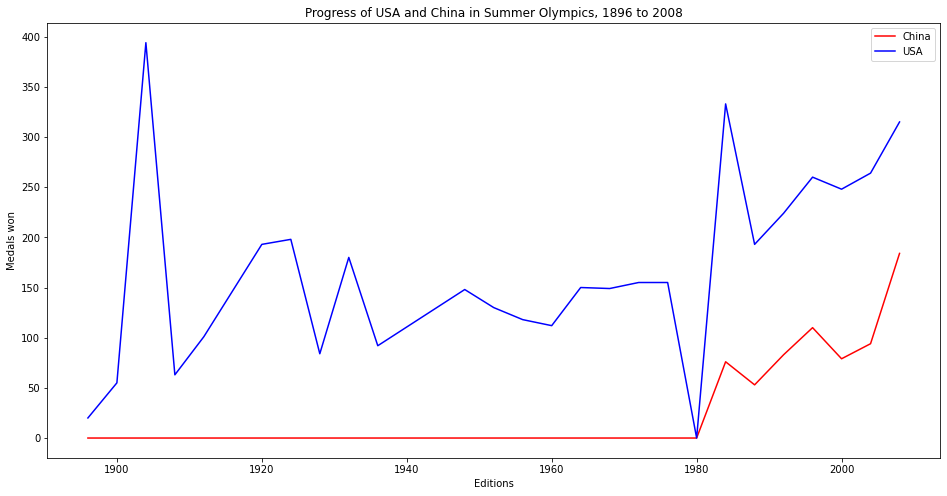

In [12]:
from matplotlib import pyplot as plt

cols = usa_china.columns 
#list of columns from df
progress_values = usa_china.values.tolist() 
#lists of values according to each "Edition" column for USA and China
china = progress_values[0]
usa = progress_values[1]

plt.figure(figsize=(16, 8))
plt.plot(cols, china, color="red")
plt.plot(cols, usa, color="blue")

plt.xlabel("Editions")
plt.ylabel("Medals won")
plt.title("Progress of USA and China in Summer Olympics, 1896 to 2008")
legend_labels = ["china", "usa"]
plt.legend(["China", "USA"], loc=0)
plt.show()

China did not participate until the 1984 Summer Olympics, except for the 1956 games in which they won no medals. 
The USA did not participate in the 1980 Summer Olympics due to their boycott of the games.

## Question 6:
Show the distribution of male and female medal winners from 1896 to 2008

In [15]:
medal_counts = olympics_df.groupby("Gender")\
               .Medal.count()\
               .reset_index(name="Medal Count")\
               .sort_values("Medal Count", ascending=False)

medal_counts.reset_index(drop=True, inplace=True)
medal_counts.drop([2], axis=0, inplace=True) 
#drop third row "USA" from "Gender", a result of incorrect data
medal_count_men = medal_counts.iloc[0]["Medal Count"] 
#variable that captures the total medals for men in df
medal_count_women = medal_counts.iloc[1]["Medal Count"] 
#variable that captures the total medals for women in df
total_medals = medal_count_men + medal_count_women
medal_counts["Medal Percentage"] = [round(medal_count_men / total_medals, 3) * 100,\
                                   round(medal_count_women / total_medals, 3) * 100]
#new column representing percentage of medals for men and women, derived from "Medal Count" column

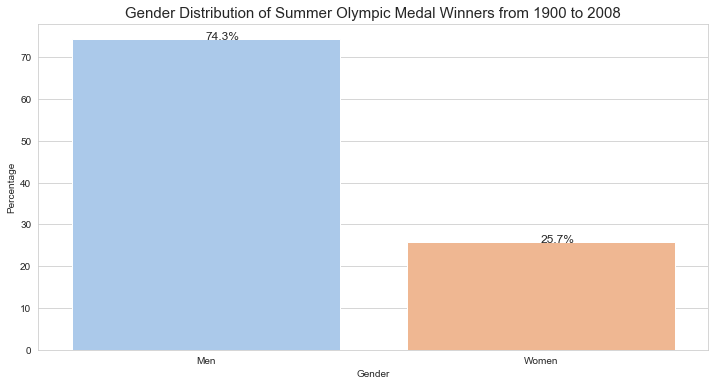

In [16]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")
bar,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x="Gender", y="Medal Percentage", data=medal_counts)
ax.set_title("Gender Distribution of Summer Olympic Medal Winners from 1900 to 2008", fontsize=15)
ax.set_xlabel ("Gender")
ax.set_ylabel ("Percentage")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(),"%.1f%%"% rect.get_height(), fontsize=12)
    #calculate Gender percentages and annotate bar plot

## Question 7:
Any further remarks on the data set

There are currently 339 events at the Summer Olympics and this file has 578 unique "Event" values. It is worth exploring if discontinued events have disadvantaged countries that historically performed well in them. It is also important to be mindful of new events when examining the progress of country performance.  
